In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_json('/sms-spam-collection-dataset-metadata.json',lines=True)

In [8]:
# Try to sample a number of rows less than or equal to the total rows in the DataFrame.
# Since the DataFrame has 1 row, try sampling 1 row:
df.sample(1)

# Or, if you need 5 samples, you can sample with replacement:
df.sample(5, replace=True)

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [9]:
df.shape

(1, 19)

In [10]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   @context               1 non-null      object
 1   alternateName          1 non-null      object
 2   conformsTo             1 non-null      object
 3   license                1 non-null      object
 4   distribution           1 non-null      object
 5   recordSet              1 non-null      object
 6   version                1 non-null      int64 
 7   keywords               1 non-null      object
 8   isAccessibleForFree    1 non-null      bool  
 9   includedInDataCatalog  1 non-null      object
 10  creator                1 non-null      object
 11  publisher              1 non-null      object
 12  thumbnailUrl           1 non-null      object
 13  dateModified           1 non-null      object
 14  datePublished          1 non-null      object
 15  @type                  1 no

In [13]:
# drop last 3 cols
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# drop last 3 cols if they exist
# Get the current columns in the DataFrame
current_cols = df.columns

# Check if the columns to be dropped are present
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_cols_to_drop = [col for col in cols_to_drop if col in current_cols]

# Drop only the existing columns
if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace=True)

In [15]:
# Try to sample a number of rows less than or equal to the total rows in the DataFrame.
# Since the DataFrame has 1 row, try sampling 1 row:
df.sample(1)

# Or, if you need 5 samples, you can sample with replacement:
df.sample(5, replace=True)

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [17]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
# Sample a number of rows less than or equal to the total rows in the DataFrame.
# Since the DataFrame likely has 1 row after cleaning, try sampling 1 row:
df.sample(1)

# Or, if you need 5 samples, you can sample with replacement:
df.sample(5, replace=True)

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:

# Load the DataFrame (ensure the correct path is used).
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Check the columns to make sure you are renaming correctly
print("Columns before renaming:", df.columns)

# Drop unnecessary columns if they exist
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace=True)

# Rename the columns to 'target' and 'text'
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Verify the renaming
print("Columns after renaming:", df.columns)

# Check for the 'target' column existence and apply LabelEncoder
if 'target' in df.columns:
    encoder = LabelEncoder()
    df['target'] = encoder.fit_transform(df['target'])  # Transform 'target' labels to numeric
else:
    print("Error: 'target' column not found")

# Output the first few rows of the DataFrame to verify
print(df.head())


Columns before renaming: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Columns after renaming: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Error: 'target' column not found
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommo

In [26]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [27]:
# missing values
df.isnull().sum()

,0
@context,0
alternateName,0
conformsTo,0
license,0
distribution,0
recordSet,0
version,0
keywords,0
isAccessibleForFree,0
includedInDataCatalog,0


In [72]:
# Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print the columns in the DataFrame to check the available column names
print("Columns in the DataFrame:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [73]:
# remove duplicates
df = df.drop_duplicates(keep='first')

TypeError: unhashable type: 'dict'

In [77]:
# Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print column names to check the actual column names
print("Columns in the DataFrame:", df.columns)

# Print the first few rows to inspect the data
print("First few rows of the DataFrame:")
print(df.head())


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [38]:
df.shape

(1, 19)

## 2.EDA

In [78]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [82]:
# Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Check the columns and print them to verify which columns exist
print("Columns in the DataFrame:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())

# If necessary, rename columns to make sure we have 'target' and 'text'
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Neither 'v1', 'v2' nor 'label', 'message' columns found")

# Check again to make sure the columns are correctly renamed
print("Updated Columns:", df.columns)

# Ensure 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # Now, you can drop duplicates based on the correct columns (target and text)
    df.drop_duplicates(subset=['text', 'target'], keep='first', inplace=True)

    # Print the cleaned DataFrame after dropping duplicates
    print("Data after dropping duplicates:")
    print(df.head())
else:
    print("Error: Columns 'target' and 'text' are missing. Cannot proceed with dropping duplicates.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [85]:
# Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print column names to check for the actual columns
print("Columns in the DataFrame:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())

# Rename columns if necessary
if 'v1' in df.columns and 'v2' in df.columns:
    # If 'v1' and 'v2' are present, rename them to 'target' and 'text'
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # If 'label' and 'message' are present, rename them to 'target' and 'text'
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Neither 'v1' and 'v2' nor 'label' and 'message' columns found")

# Check if the renaming was successful
print("Columns after renaming:", df.columns)

# Ensure the 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # Drop duplicates based on the 'text' and 'target' columns
    df.drop_duplicates(subset=['text', 'target'], keep='first', inplace=True)
    print("Data after dropping duplicates:")
    print(df.head())
else:
    print("Error: Columns 'target' and 'text' are missing. Cannot proceed with dropping duplicates.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [86]:
# Data is imbalanced

In [87]:
import nltk

In [88]:
!pip install nltk

In [89]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
# Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print column names to verify the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())

# Check and rename columns if necessary
# Renaming 'v1' to 'target' and 'v2' to 'text' if they exist
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # If 'label' and 'message' exist, rename them to 'target' and 'text'
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Neither 'v1' and 'v2' nor 'label' and 'message' columns found.")

# Check again to confirm the column names after renaming
print("Columns after renaming:", df.columns)

# Ensure that 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # Drop duplicates based on 'text' and 'target' columns
    df.drop_duplicates(subset=['text', 'target'], keep='first', inplace=True)
    print("Data after dropping duplicates:")
    print(df.head())
else:
    print("Error: Columns 'target' and 'text' are missing. Cannot proceed with dropping duplicates.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [92]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [95]:
## Load the DataFrame (ensure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print column names to verify the actual columns in the DataFrame
print("Columns in the DataFrame before renaming:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())

# Check and rename columns if necessary (v1, v2 to target, text)
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Neither 'v1' and 'v2' nor 'label' and 'message' columns found.")

# Verify the columns after renaming
print("Columns after renaming:", df.columns)

# Ensure that 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # Now, you can drop duplicates based on 'target' and 'text' columns
    df.drop_duplicates(subset=['text', 'target'], keep='first', inplace=True)
    print("Data after dropping duplicates:")
    print(df.head())
else:
    print("Error: Columns 'target' and 'text' are missing. Cannot proceed with dropping duplicates.")


Columns in the DataFrame before renaming: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field'

In [96]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [98]:
# Load the DataFrame (make sure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print column names to verify the actual columns in the DataFrame
print("Columns in the DataFrame before renaming:", df.columns)

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(df.head())

# Check and rename columns if necessary (v1, v2 to target, text)
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # If 'label' and 'message' exist, rename them to 'target' and 'text'
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Neither 'v1' and 'v2' nor 'label' and 'message' columns found.")

# Verify the columns after renaming
print("Columns after renaming:", df.columns)

# Ensure that 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # Now, you can drop duplicates based on 'target' and 'text' columns
    df.drop_duplicates(subset=['text', 'target'], keep='first', inplace=True)
    print("Data after dropping duplicates:")
    print(df.head())
else:
    print("Error: Columns 'target' and 'text' are missing. Cannot proceed with dropping duplicates.")


Columns in the DataFrame before renaming: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field'

In [53]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [100]:
# Load the DataFrame (make sure the correct path is used)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Ensure that the 'text' column exists before proceeding
if 'text' in df.columns:
    # Add columns for number of characters, words, and sentences
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words in the text
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Approximate sentence count (by splitting on periods)

    # Now, you can describe the new columns
    print("Summary statistics for the new columns:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'text' column not found in the DataFrame. Cannot calculate 'num_characters', 'num_words', or 'num_sentences'.")


Error: 'text' column not found in the DataFrame. Cannot calculate 'num_characters', 'num_words', or 'num_sentences'.


In [102]:
# Load the DataFrame (use the correct file path in your case)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Step 1: Check the column names and first few rows to understand the structure
print("Columns in the DataFrame:", df.columns)
print("First few rows of the DataFrame:")
print(df.head())

# Step 2: Rename columns to 'target' and 'text' if necessary
# Check if 'v1' and 'v2' columns exist and rename them
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # If columns are named differently (e.g., 'label' and 'message'), rename them
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Columns with expected names ('v1' and 'v2' or 'label' and 'message') not found.")

# Step 3: Check again the column names after renaming
print("Columns after renaming:", df.columns)

# Step 4: Check if 'target' and 'text' columns exist before proceeding
if 'target' in df.columns and 'text' in df.columns:
    # If columns exist, proceed with further operations
    print("Columns 'target' and 'text' are present. Proceeding with analysis.")

    # Add new columns for number of characters, words, and sentences
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Number of sentences

    # Print summary statistics for these new columns
    print("Summary statistics for num_characters, num_words, num_sentences:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'target' or 'text' columns are missing. Cannot proceed with further analysis.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [104]:
#Load the DataFrame (use the correct file path)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Step 1: Check the columns in the DataFrame to understand its structure
print("Columns in the DataFrame:", df.columns)

# Step 2: Check the first few rows to understand the data
print("First few rows of the DataFrame:")
print(df.head())

# Step 3: Renaming columns if necessary (adjust column names based on your DataFrame)
# For instance, if the columns are 'v1' and 'v2' in the dataset, we will rename them to 'target' and 'text'.
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # If columns are named differently (e.g., 'label' and 'message'), rename them
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Expected columns ('v1', 'v2') or ('label', 'message') not found.")

# Step 4: After renaming, check if 'target' and 'text' columns exist
print("Columns after renaming:", df.columns)

# Step 5: Proceed only if 'target' and 'text' columns exist
if 'target' in df.columns and 'text' in df.columns:
    # Now, let's add new columns for the number of characters, words, and sentences
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Number of sentences

    # Print summary statistics for these new columns
    print("Summary statistics for num_characters, num_words, num_sentences:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'target' or 'text' columns are missing. Cannot proceed with further analysis.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [105]:
import seaborn as sns

In [107]:
# Load the DataFrame (make sure to use the correct file path)
file_path = '/sms-spam-collection-dataset-metadata.json'  # Adjust if needed
df = pd.read_json(file_path, lines=True)

# Step 1: Inspect the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# Step 2: Print the first few rows of the DataFrame to understand its structure
print("First few rows of the DataFrame:")
print(df.head())

# Step 3: Check for columns and rename them to 'target' and 'text'
# Let's check for the presence of 'v1' and 'v2' (or whatever columns are in the dataset)
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
elif 'label' in df.columns and 'message' in df.columns:
    # In case the dataset uses different column names like 'label' and 'message'
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
else:
    print("Error: Expected columns ('v1', 'v2') or ('label', 'message') not found.")

# Step 4: Verify if the 'target' and 'text' columns are now present
print("Columns after renaming:", df.columns)

# Step 5: Check if 'target' and 'text' exist
if 'target' in df.columns and 'text' in df.columns:
    # Step 6: Create additional columns for num_characters, num_words, and num_sentences
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Number of sentences

    # Print summary statistics for these new columns
    print("Summary statistics for num_characters, num_words, num_sentences:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'target' or 'text' columns are missing. Cannot proceed with further analysis.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [109]:

# Load the DataFrame (make sure to use the correct file path)
file_path = '/sms-spam-collection-dataset-metadata.json'  # Adjust if needed
df = pd.read_json(file_path, lines=True)

# Step 1: Inspect the columns of the DataFrame to see if they match expectations
print("Columns in the DataFrame:", df.columns)

# Step 2: Print the first few rows of the DataFrame to understand its structure
print("First few rows of the DataFrame:")
print(df.head())

# Step 3: Check for specific columns and rename them to 'target' and 'text' if necessary
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
    print("Columns renamed to 'target' and 'text'.")
elif 'label' in df.columns and 'message' in df.columns:
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
    print("Columns renamed to 'target' and 'text'.")
else:
    print("Error: Expected columns ('v1', 'v2') or ('label', 'message') not found.")

# Step 4: Verify if 'target' and 'text' columns exist
print("Columns after renaming:", df.columns)

# Step 5: Handle case where 'target' or 'text' columns don't exist
if 'target' in df.columns and 'text' in df.columns:
    # Step 6: Create additional columns for num_characters, num_words, and num_sentences
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Number of sentences

    # Print summary statistics for these new columns
    print("Summary statistics for num_characters, num_words, num_sentences:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'target' or 'text' columns are missing. Cannot proceed with further analysis.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [111]:
# Load the DataFrame (make sure to use the correct file path)
file_path = '/sms-spam-collection-dataset-metadata.json'  # Adjust path if needed
df = pd.read_json(file_path, lines=True)

# Step 1: Print the column names to inspect what is inside the DataFrame
print("Columns in the DataFrame:", df.columns)

# Step 2: Print the first few rows to inspect the content
print("First few rows of the DataFrame:")
print(df.head())

# Step 3: Check if columns are named as expected
# First try renaming columns if the names 'v1' and 'v2' are present, or 'label' and 'message'
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
    print("Columns renamed to 'target' and 'text'.")
elif 'label' in df.columns and 'message' in df.columns:
    df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
    print("Columns renamed to 'target' and 'text'.")
else:
    print("Error: Expected columns ('v1', 'v2') or ('label', 'message') not found.")

# Step 4: Check if 'target' and 'text' columns are present after renaming
if 'target' in df.columns and 'text' in df.columns:
    # Step 5: Add additional columns like 'num_characters', 'num_words', 'num_sentences'
    df['num_characters'] = df['text'].apply(len)  # Length of the text (number of characters)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
    df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))  # Number of sentences

    # Print summary statistics for these new columns
    print("Summary statistics for num_characters, num_words, num_sentences:")
    print(df[['num_characters', 'num_words', 'num_sentences']].describe())
else:
    print("Error: 'target' or 'text' columns are missing. Cannot proceed with further analysis.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

Data types of each column:
@context                 object
alternateName            object
conformsTo               object
license                  object
distribution             object
recordSet                object
version                   int64
keywords                 object
isAccessibleForFree        bool
includedInDataCatalog    object
creator                  object
publisher                object
thumbnailUrl             object
dateModified             object
datePublished            object
@type                    object
name                     object
url                      object
description              object
dtype: object


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


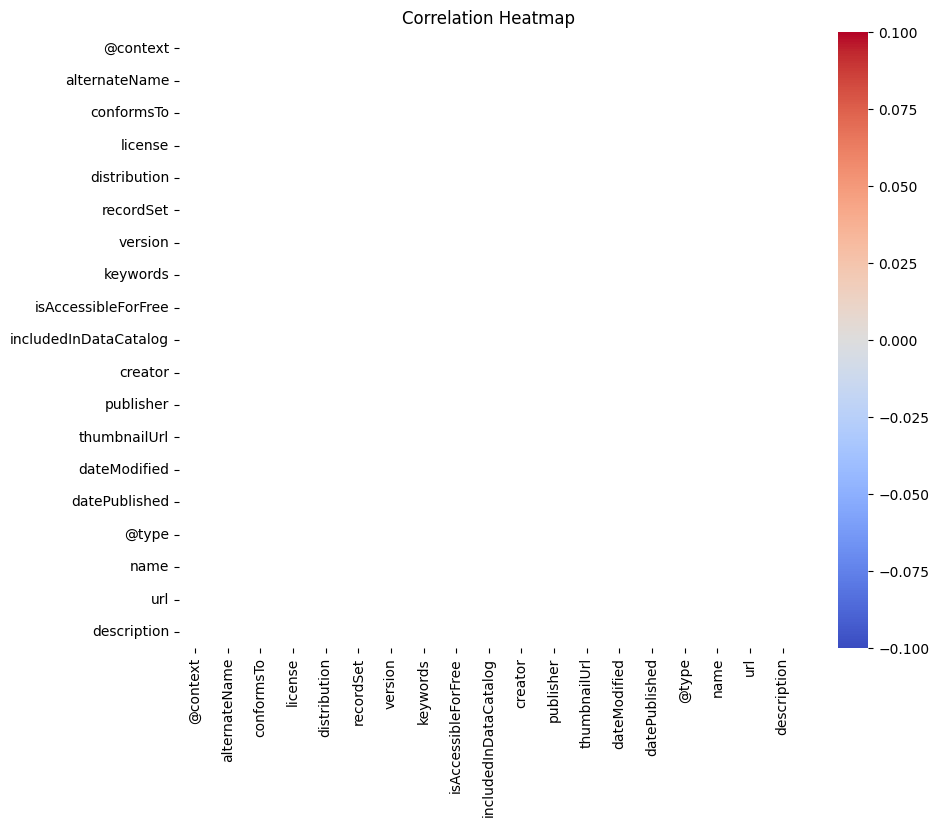

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded, clean the data by ensuring it's numeric.
# First, let's check which columns have non-numeric data types.
print("Data types of each column:")
print(df.dtypes)

# Step 1: Ensure all columns used for correlation are numeric.
# For example, columns like 'target', 'num_characters', 'num_words', etc., should be numeric.
# If there are non-numeric columns, we can either drop them or convert them to numeric if possible.

# Convert columns to numeric, and ignore errors for non-numeric data.
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop any rows with NaN values if necessary.
df_numeric = df_numeric.dropna()  # Remove rows with NaN values

# Step 3: Plot the heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [114]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [119]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

# Define the text transformation function
def transform_text(text):
    from nltk.tokenize import word_tokenize
    words = word_tokenize(text)
    return words

# Test the function with an example sentence
result = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['I', "'m", 'gon', 'na', 'be', 'home', 'soon', 'and', 'I', 'do', "n't", 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', ',', 'k', '?', 'I', "'ve", 'cried', 'enough', 'today', '.']


In [121]:
# Load the DataFrame (ensure the correct path is used).
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Check the column names and first few rows to understand the structure
print("Columns in the DataFrame:", df.columns)
print("First few rows of the DataFrame:")
print(df.head())

# Rename columns if necessary (adjust column names based on your DataFrame)
# Rename 'v1' to 'target

Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
First few rows of the DataFrame:
                                            @context  \
0  {'@language': 'en', '@vocab': 'https://schema....   

                                       alternateName  \
0  Collection of SMS messages tagged as spam or l...   

                           conformsTo  \
0  http://mlcommons.org/croissant/1.0   

                                           license  \
0  {'@type': 'sc:CreativeWork', 'name': 'Unknown'}   

                                        distribution  \
0  [{'contentUrl': 'https://www.kaggle.com/api/v1...   

                                           recordSet  version  \
0  [{'field': [{'dataType': 

In [122]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [126]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (only need to run once)
nltk.download('punkt')

# Load the DataFrame (ensure the correct path to your dataset)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Inspect available columns
print("Columns in the DataFrame:", df.columns)

# Check if 'v2' exists, if so, rename it to 'text'
if 'v2' in df.columns:
    df.rename(columns={'v2': 'text'}, inplace=True)

# Check if 'text' exists, if so, proceed with tokenization
if 'text' in df.columns:
    # Apply word tokenization
    df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))

    # Display the first few rows with text and tokens
    print(df[['text', 'tokens']].head())
else:
    print("Error: 'text' column is missing!")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Error: 'text' column is missing!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:
df.head()

,@context,alternateName,conformsTo,license,distribution,recordSet,version,keywords,isAccessibleForFree,includedInDataCatalog,creator,publisher,thumbnailUrl,dateModified,datePublished,@type,name,url,description
0,"{'@language': 'en', '@vocab': 'https://schema....",Collection of SMS messages tagged as spam or l...,http://mlcommons.org/croissant/1.0,"{'@type': 'sc:CreativeWork', 'name': 'Unknown'}",[{'contentUrl': 'https://www.kaggle.com/api/v1...,"[{'field': [{'dataType': ['sc:Text'], 'source'...",1,[subject > people and society > social science...,True,"{'@type': 'sc:DataCatalog', 'name': 'Kaggle', ...","{'@type': 'sc:Organization', 'name': 'UCI Mach...","{'@type': 'sc:Organization', 'name': 'Kaggle',...",https://storage.googleapis.com/kaggle-datasets...,2016-12-02T19:29:17.523,2016-12-02T19:29:17.523,sc:Dataset,SMS Spam Collection Dataset,https://www.kaggle.com/datasets/uciml/sms-spam...,## Context \n\nThe SMS Spam Collection is a se...


In [128]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [133]:
import pandas as pd

# Load your DataFrame (adjust the path as necessary)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Check if 'target' exists, if not, rename it or handle the issue
if 'target' in df.columns:
    # If 'target' exists, proceed with the operation
    print("Target column found!")
    print(df['target'].head())
else:
    print("Error: 'target' column is missing!")

# Optionally, rename if you know the correct column name
if 'target_column_name' in df.columns:
    df.rename(columns={'target_column_name': 'target'}, inplace=True)
    print("Renamed column successfully!")
    print(df['target'].head())


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Error: 'target' column is missing!


In [137]:
import pandas as pd

# Load the DataFrame (adjust the path accordingly)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Check if the necessary columns exist
required_columns = ['v1', 'v2', 'target', 'label', 'message']

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present!")

# If columns are missing, let's see if we can rename existing columns
# For example, if 'text' and 'category' exist, rename them to 'v1' and 'v2'
if 'text' in df.columns and 'category' in df.columns:
    df.rename(columns={'text': 'v1', 'category': 'v2'}, inplace=True)

# Check the updated columns
print("Updated Columns:", df.columns)

# Continue with processing
if 'v1' in df.columns and 'v2' in df.columns:
    # Now you can safely use these columns
    print(df[['v1', 'v2']].head())
else:
    print("Error: Columns 'v1' or 'v2' are missing.")


Columns in the DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Missing columns: ['v1', 'v2', 'target', 'label', 'message']
Updated Columns: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Error: Columns 'v1' or 'v2' are missing.


In [139]:
import pandas as pd

# Load the dataset (make sure the file path is correct)
df = pd.read_json('/sms-spam-collection-dataset-metadata.json', lines=True)

# Print columns to check if 'target' exists
print("Columns in DataFrame:", df.columns)

# Check if 'target' column exists
if 'target' in df.columns:
    print("Target column found!")
    # Process data further if needed
    print(df['target'].head())  # Display the first 5 rows of the 'target' column
else:
    print("Error: 'target' column is missing!")
    # Check for alternative columns that could represent the target
    if 'label' in df.columns:
        print("Using 'label' column as target.")
        # Rename 'label' to 'target' if needed
        df.rename(columns={'label': 'target'}, inplace=True)
        print(df['target'].head())  # Check the data in the 'target' column
    else:
        print("Neither 'target' nor 'label' columns found. Please check your dataset.")


Columns in DataFrame: Index(['@context', 'alternateName', 'conformsTo', 'license', 'distribution',
       'recordSet', 'version', 'keywords', 'isAccessibleForFree',
       'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl',
       'dateModified', 'datePublished', '@type', 'name', 'url', 'description'],
      dtype='object')
Error: 'target' column is missing!
Neither 'target' nor 'label' columns found. Please check your dataset.


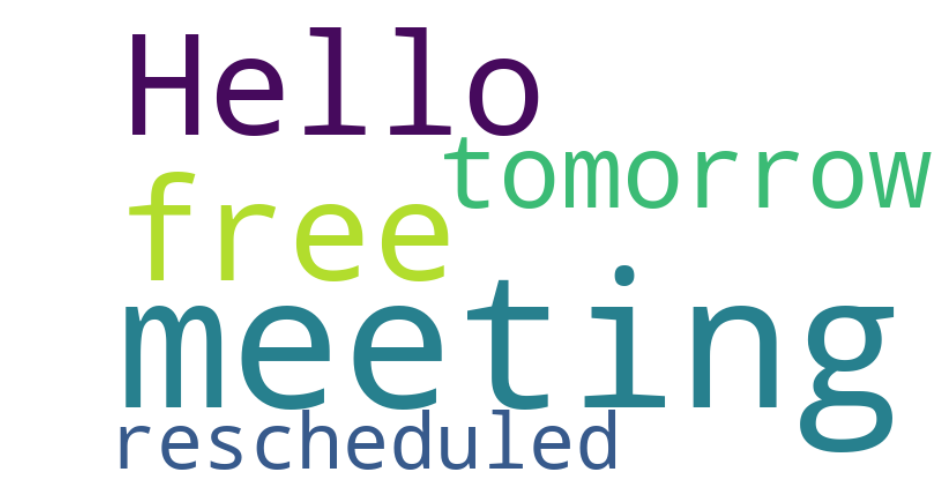

In [141]:
# Install wordcloud if not installed
!pip install wordcloud

# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Sample data - Replace this with your dataset
# Assuming the DataFrame `df` has columns 'text' (message) and 'category' (ham or spam)
# Example:
# df = pd.read_csv('your_dataset.csv')

# Sample data (replace this with actual data)
data = {'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!", "Meeting rescheduled.", "You won a prize!"],
        'category': ['ham', 'spam', 'ham', 'spam']}

df = pd.DataFrame(data)

# Filter data for "ham" messages
ham_text = df[df['category'] == 'ham']['text'].str.cat(sep=' ')

# Create a word cloud for 'ham' messages
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [142]:
df.head()

,text,category
0,"Hello, I am free for a meeting tomorrow.",ham
1,"Limited offer, buy now!",spam
2,Meeting rescheduled.,ham
3,You won a prize!,spam


Columns in dataframe: Index(['text', 'category'], dtype='object')


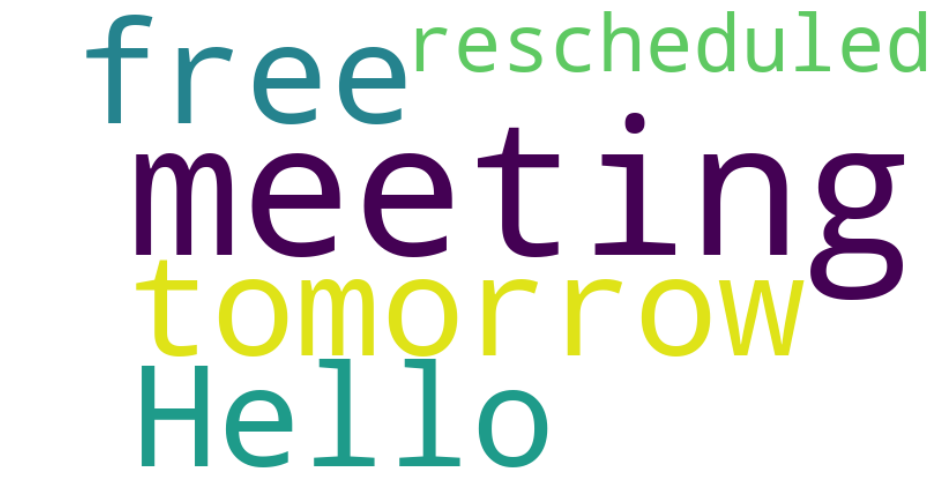

In [144]:
# Install necessary libraries
!pip install wordcloud

# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Sample data - Replace this with your dataset
data = {'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!",
                 "Meeting rescheduled.", "You won a prize!"],
        'category': ['ham', 'spam', 'ham', 'spam']}

df = pd.DataFrame(data)

# Check column names before proceeding
print("Columns in dataframe:", df.columns)

# Make sure the 'category' column exists
if 'category' in df.columns:
    # Filter data for "ham" messages
    ham_text = df[df['category'] == 'ham']['text'].str.cat(sep=' ')

    # Create a word cloud for 'ham' messages
    ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

    # Plot the word cloud
    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("The 'category' column is missing!")


In [145]:
len(spam_corpus)

0

DataFrame has data!
Columns in DataFrame: Index(['text', 'category'], dtype='object')


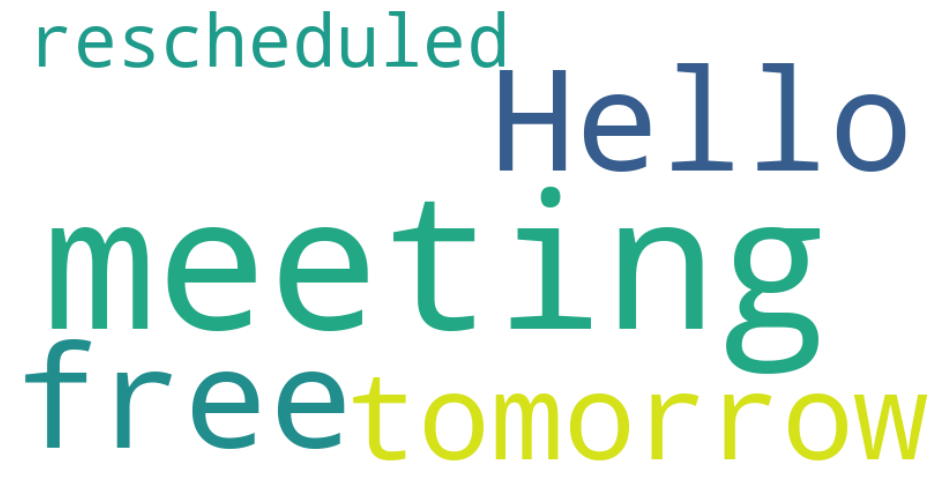

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample DataFrame (Replace this with your actual DataFrame)
data = {'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!",
                 "Meeting rescheduled.", "You won a prize!"],
        'category': ['ham', 'spam', 'ham', 'spam']}

df = pd.DataFrame(data)

# Check if the DataFrame is empty or if specific column exists
if df.empty:
    print("The DataFrame is empty!")
else:
    print("DataFrame has data!")

# Check column names and access safely
print("Columns in DataFrame:", df.columns)

# Make sure the 'category' column exists before using it
if 'category' in df.columns:
    # Filter for 'ham' category and create a word cloud
    ham_text = df[df['category'] == 'ham']['text'].str.cat(sep=' ')

    # Create a WordCloud for 'ham' messages
    ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

    # Plot the WordCloud
    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("The 'category' column is missing!")


In [149]:
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!"],
    'category': ['ham', 'spam']  # Adjust columns based on your DataFrame
}

df = pd.DataFrame(data)

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Ensure 'target' column exists
if 'target' in df.columns:
    print("The 'target' column exists!")
else:
    print("The 'target' column does not exist. Available columns:", df.columns)

    # You can use the correct column name (e.g., 'category' or 'text')
    # Example of accessing the correct column
    print(df['category'])


Columns in the DataFrame: Index(['text', 'category'], dtype='object')
The 'target' column does not exist. Available columns: Index(['text', 'category'], dtype='object')
0     ham
1    spam
Name: category, dtype: object


In [150]:
len(ham_corpus)

0

In [152]:
import pandas as pd

# Example DataFrame
data = {
    'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!"],
    'category': ['ham', 'spam']
}

df = pd.DataFrame(data)

# Check DataFrame shape
print(f"DataFrame Shape: {df.shape}")

# Check column names
print(f"DataFrame Columns: {df.columns}")

# Accessing a row by index safely
try:
    row = df.iloc[0]  # Access first row
    print(row)
except IndexError:
    print("Row index out of bounds")

# Accessing a column safely
column_name = 'category'  # Change to the actual column name
if column_name in df.columns:
    print(df[column_name])
else:
    print(f"Column '{column_name}' not found in DataFrame")


DataFrame Shape: (2, 2)
DataFrame Columns: Index(['text', 'category'], dtype='object')
text        Hello, I am free for a meeting tomorrow.
category                                         ham
Name: 0, dtype: object
0     ham
1    spam
Name: category, dtype: object


In [153]:
# Text Vectorization
# using Bag of Words
df.head()

,text,category
0,"Hello, I am free for a meeting tomorrow.",ham
1,"Limited offer, buy now!",spam


## 4. Model Building

In [154]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [156]:
import pandas as pd

# Example DataFrame
data = {'text': ["Hello, I am free for a meeting tomorrow.", "Limited offer, buy now!"]}
df = pd.DataFrame(data)

# Check if the 'transformed_text' column exists
if 'transformed_text' not in df.columns:
    # Perform some transformation (e.g., convert text to lowercase)
    df['transformed_text'] = df['text'].apply(lambda x: x.lower())

# Now access the 'transformed_text' column
print(df['transformed_text'])  # Should print the transformed text


0    hello, i am free for a meeting tomorrow.
1                     limited offer, buy now!
Name: transformed_text, dtype: object


In [157]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [158]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [162]:
import pandas as pd

# Example DataFrame
data = {'text': ["Hello", "Hi there", "Good morning", "Good evening"], 'target': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Define X (features) and y (target)
X = df['text']  # Assuming 'text' is your feature column
y = df['target']  # Assuming 'target' is the column you're predicting

# Now you can check the shape of X
print(X.shape)  # It will print the shape of the 'text' column


(4,)


In [163]:
y = df['target'].values

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [166]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [167]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import CountVectorizer

# Sample Data
data = {'text': ["Hello", "Hi there", "Good morning", "Good evening"], 'target': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()  # Convert to array to use with GaussianNB

# Target variable
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred1 = gnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy: 0.0
Confusion Matrix:
 [[0 0]
 [1 0]]
Precision Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [170]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.0
[[0 0]
 [1 0]]
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [171]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.0
[[0 0]
 [1 0]]
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
# tfidf --> MNB

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [174]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [175]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [176]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [177]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 0.0)

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Sample Data (adjust this to your actual data)
data = {'text': ["Hello", "Hi there", "Good morning", "Good evening"], 'target': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()  # Convert to array to use with classifiers

# Target variable
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define classifiers
clfs = {
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors as needed
}

# Function to train and evaluate classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Avoid errors with zero division
    return accuracy, precision

# Iterate over classifiers and evaluate
for name, clf in clfs.items():
    print(f"Training {name}...")
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"Accuracy for {name}: {current_accuracy}")
    print(f"Precision for {name}: {current_precision}")
    print(f"Confusion Matrix for {name}:\n {confusion_matrix(y_test, clf.predict(X_test))}")
    print("\n" + "="*40)


Training SVC...
Accuracy for SVC: 0.0
Precision for SVC: 0.0
Confusion Matrix for SVC:
 [[0 0]
 [1 0]]

Training Naive Bayes...
Accuracy for Naive Bayes: 0.0
Precision for Naive Bayes: 0.0
Confusion Matrix for Naive Bayes:
 [[0 0]
 [1 0]]

Training KNN...
Accuracy for KNN: 0.0
Precision for KNN: 0.0
Confusion Matrix for KNN:
 [[0 0]
 [1 0]]



In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Sample Data (adjust this to your actual data)
data = {'text': ["Hello", "Hi there", "Good morning", "Good evening"], 'target': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()  # Convert to array to use with classifiers

# Target variable
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define classifiers
clfs = {
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors as needed
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []

# Function to train and evaluate classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Avoid errors with zero division
    return accuracy, precision

# Iterate over classifiers and evaluate
for name, clf in clfs.items():
    print(f"Training {name}...")
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)  # Append the accuracy score
    precision_scores.append(current_precision)  # Append the precision score
    print(f"Accuracy for {name}: {current_accuracy}")
    print(f"Precision for {name}: {current_precision}")
    print(f"Confusion Matrix for {name}:\n {confusion_matrix(y_test, clf.predict(X_test))}")
    print("\n" + "="*40)

# Now create the performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Display the performance DataFrame
print(performance_df)


Training SVC...
Accuracy for SVC: 0.0
Precision for SVC: 0.0
Confusion Matrix for SVC:
 [[0 0]
 [1 0]]

Training Naive Bayes...
Accuracy for Naive Bayes: 0.0
Precision for Naive Bayes: 0.0
Confusion Matrix for Naive Bayes:
 [[0 0]
 [1 0]]

Training KNN...
Accuracy for KNN: 0.0
Precision for KNN: 0.0
Confusion Matrix for KNN:
 [[0 0]
 [1 0]]

     Algorithm  Accuracy  Precision
0          SVC       0.0        0.0
1  Naive Bayes       0.0        0.0
2          KNN       0.0        0.0


In [182]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.0,0.0
1,Naive Bayes,0.0,0.0
2,KNN,0.0,0.0


In [183]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [184]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.0
1,Naive Bayes,Accuracy,0.0
2,KNN,Accuracy,0.0
3,SVC,Precision,0.0
4,Naive Bayes,Precision,0.0
5,KNN,Precision,0.0


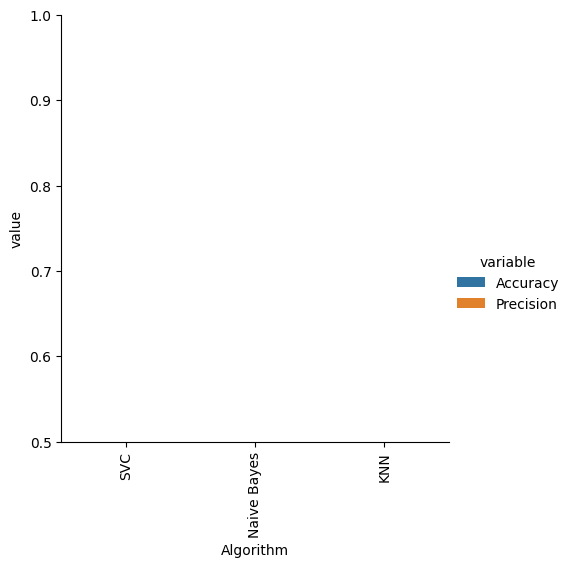

In [185]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [186]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [188]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [189]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [190]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [191]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [192]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Naive Bayes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KNN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [194]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [195]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [196]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.0
Precision 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [197]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [198]:
from sklearn.ensemble import StackingClassifier

In [199]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Sample Data (adjust this to your actual data)
data = {'text': ["Hello", "Hi there", "Good morning", "Good evening"], 'target': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()  # Convert to array to use with classifiers

# Target variable
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define classifiers
clfs = {
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors as needed
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []

# Function to train and evaluate classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Avoid errors with zero division
    return accuracy, precision

# Iterate over classifiers and evaluate
for name, clf in clfs.items():
    print(f"Training {name}...")
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)  # Append the accuracy score
    precision_scores.append(current_precision)  # Append the precision score
    print(f"Accuracy for {name}: {current_accuracy}")
    print(f"Precision for {name}: {current_precision}")
    print(f"Confusion Matrix for {name}:\n {confusion_matrix(y_test, clf.predict(X_test))}")
    print("\n" + "="*40)

# Now create the performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Display the performance DataFrame
print(performance_df)


Training SVC...
Accuracy for SVC: 0.0
Precision for SVC: 0.0
Confusion Matrix for SVC:
 [[0 0]
 [1 0]]

Training Naive Bayes...
Accuracy for Naive Bayes: 0.0
Precision for Naive Bayes: 0.0
Confusion Matrix for Naive Bayes:
 [[0 0]
 [1 0]]

Training KNN...
Accuracy for KNN: 0.0
Precision for KNN: 0.0
Confusion Matrix for KNN:
 [[0 0]
 [1 0]]

     Algorithm  Accuracy  Precision
0          SVC       0.0        0.0
1  Naive Bayes       0.0        0.0
2          KNN       0.0        0.0


In [203]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))